In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

In [6]:
simulation = 'maps'
# word_path = 'E'
# dir_dataset = word_path + ':/DataSet5GHz/'
dir_dataset = 'G:/Otros ordenadores/False-2-Tesis-Maestria/DataSet5GHz/Users-and-APsOpti-final/'
n_APs = [1,2,3,4,5]
# K = 1.380649e-23
# T = 290
# B = 80
# v_min = K*T*B
# v_max = 26

In [7]:
mean_loss = []
mean_val_loss = []
   
mean_rmse = []
mean_val_rmse = []
mean_mae = []
mean_val_mae = []

In [8]:
for i in n_APs:
    
    if i == 1:
        case_users = '20users'
    if i == 2:
        case_users = '40users'
    if i == 3:
        case_users = '60users'
    if i == 4 or i == 5:
        case_users = '100users'
    
    if i != 4:
        loaded_arrays = np.load(dir_dataset + case_users + '/Models/' + str(i) + 'add-v3_history.npz')
    else:
        loaded_arrays = np.load(dir_dataset + case_users + '/Models/' + str(i) + 'add-v4_history.npz')
    
    losses = loaded_arrays['losses']
    val_losses = loaded_arrays['val_losses']

    rmse_scores = loaded_arrays['rmse_scores']
    val_rmse_scores = loaded_arrays['val_rmse_scores']
    mae_scores = loaded_arrays['mae_scores']
    val_mae_scores = loaded_arrays['val_mae_scores']
        
    mean_loss.append(np.mean(losses, axis=0))
    mean_val_loss.append(np.mean(val_losses, axis=0))
   
    mean_rmse.append(np.mean(rmse_scores, axis=0))
    mean_val_rmse.append(np.mean(val_rmse_scores, axis=0))
    mean_mae.append(np.mean(mae_scores, axis=0))
    mean_val_mae.append(np.mean(val_mae_scores, axis=0))

In [9]:
# def jump(array):  
#     for i in range(1, len(array)):
#         diferencia = array[i] - array[i-1]
#         if diferencia > 0.005:
#             array[i] = array[i-1]
    
#     return array

In [10]:
mean_loss = np.array(mean_loss)
mean_val_loss = np.array(mean_val_loss)
   
mean_rmse = np.array(mean_rmse)
mean_val_rmse = np.array(mean_val_rmse)
mean_mae = np.array(mean_mae)
mean_val_mae = np.array(mean_val_mae)

In [11]:
# def create_subplots(mean_loss, mean_val_loss, mean_rmse, mean_val_rmse, mean_mae, mean_val_mae):
#     fig, axs = plt.subplots(3, 2, figsize=(12, 12), sharex=True)
#     data = [mean_loss, mean_val_loss, mean_rmse, mean_val_rmse, mean_mae, mean_val_mae]
#     labels = ['loss', 'val_loss', 'rmse', 'val_rmse', 'mae', 'val_mae']
#     colors = ['blue', 'blue', 'red', 'red', 'green', 'green']
#     linestyles = ['-', '--', '-', '--', '-', '--']

#     for i, ax in enumerate(axs.flat[:-1]):
#         for j in range(0, len(data), 2):
#             ax.plot(data[j][i, :], label=labels[j], color=colors[j], linestyle=linestyles[j])
#             ax.plot(data[j+1][i, :], label=labels[j+1], color=colors[j+1], linestyle=linestyles[j+1])
#         ax.set_title(f'{i+1} APs')
#         ax.set_ylabel('Value')
#         ax.grid(True)
#         ax.legend(prop={'size': 14})

#     # Eliminar el último subplot y su marco
#     fig.delaxes(axs[2, 1])
#     fig.patch.set_visible(False)

#     # Crear un espacio para las etiquetas comunes
#     fig.add_subplot(111, frame_on=False)
#     plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#     plt.xlabel('Epochs')

#     # Establecer la fuente y el tamaño
#     plt.rc('font', family='Times New Roman', size=15)

#     plt.tight_layout()
#     # Guardar la figura en un archivo PDF
#     with PdfPages('E:/DataSet5GHz/Models/RME_metrics.pdf') as pdf:
#         pdf.savefig(fig, bbox_inches='tight')
#     plt.show()


In [12]:
def create_subplots(mean_m1, mean_val_m1, mean_m2, mean_val_m2, simulation = simulation):
    if simulation == 'maps':
        fig, axs = plt.subplots(3, 2, figsize=(15,15))
    else:
        fig, axs = plt.subplots(2, 2, figsize=(9, 9))
        
    colors = ['blue', 'blue', 'red', 'red']
    linestyles = ['-', '--', '-', '--']
    data = [mean_m1, mean_val_m1, mean_m2, mean_val_m2]
    
    if simulation == 'maps':
        
        labels = ['RMSE', 'RMSE_val', 'MAE', 'MAE_val']        
    else:
        labels = ['PER', 'PER_val', 'IoU', 'IoU_val'] 
        

    tam = 20

    for i, ax in enumerate(axs.flat[:-1]):
    # for i, ax in enumerate(axs.flat):
        if simulation == 'maps':
            for j in range(0, len(data), 2):
                ax.plot(data[j][i, :]*20, label=labels[j], color=colors[j], linestyle=linestyles[j])
                ax.plot(data[j+1][i, :]*20, label=labels[j+1], color=colors[j+1], linestyle=linestyles[j+1])
            ax.set_title(f'{i+1} APs', family='Times New Roman', size=tam)
        else:
            for j in range(0, len(data), 2):
                ax.plot(data[j][i, :]*100, label=labels[j], color=colors[j], linestyle=linestyles[j])
                ax.plot(data[j+1][i, :]*100, label=labels[j+1], color=colors[j+1], linestyle=linestyles[j+1])
            ax.set_title(f'{i+2} APs', family='Times New Roman', size=tam)
        # ax.set_ylabel('dBm')
        ax.grid(True)
        ax.legend(prop={'size': 14})
        
        if simulation =='maps':
            # plt.xlabel('Epochs')
            # plt.ylabel('dBm')
            ax.set_xlabel('Epochs', family='Times New Roman', size=tam)
            ax.set_ylabel('Meters', family='Times New Roman', size=tam)
        else:
            ax.set_xlabel('Epochs')
            ax.set_ylabel('%')
    
    fig.tight_layout()

    # Eliminar el último subplot y su marco
    if simulation == 'maps':
        fig.delaxes(axs[2, 1])
        fig.patch.set_visible(False)
    
    # # Crear un espacio para las etiquetas comunes    
    # fig.add_subplot(111, frame_on=False)
    # plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

    # Establecer la fuente y el tamaño
    plt.rc('font', family='Times New Roman', size=tam)

    plt.tight_layout()
    fig.tight_layout(pad=2.0)
    # Guardar la figura en un archivo PDF
    if simulation == 'maps':
        with PdfPages('G:/Otros ordenadores/False-2-Tesis-Maestria/DataSet5GHz/Users-and-APsOpti-final/Results/RME_metrics.pdf') as pdf:
            pdf.savefig(fig, bbox_inches='tight')
    else:
        with PdfPages('E:/DataSet5GHz/Models/CME_metrics.pdf') as pdf:
            pdf.savefig(fig, bbox_inches='tight')
            
    plt.show()


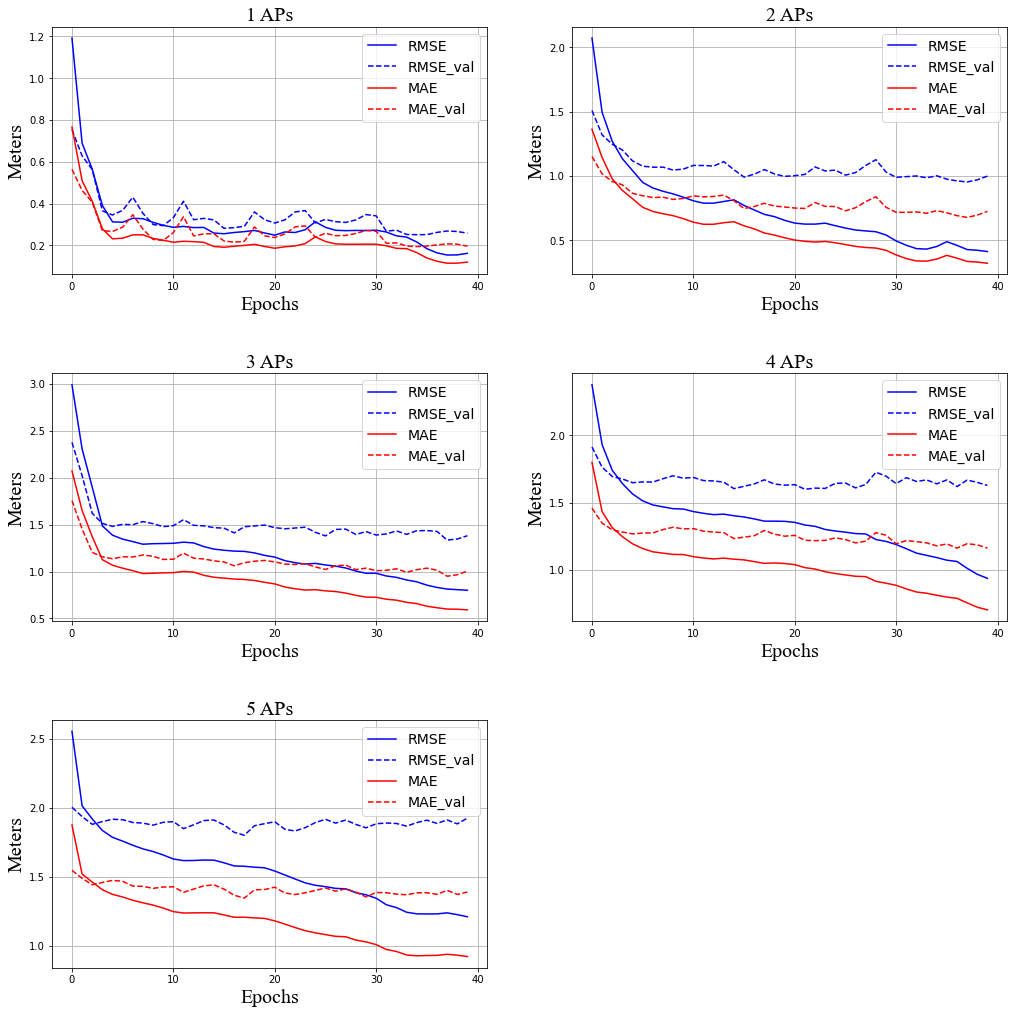

In [13]:
create_subplots(mean_rmse, mean_val_rmse, mean_mae, mean_val_mae)

In [14]:
# create_subplots(mean_error, mean_val_error, mean_iou, mean_val_iou)

_____________________________________________________

In [15]:
rmse = []
mae = []

In [16]:
# rmse_scores_big = np.array(val_rmse_scores)
# mae_scores_big = np.array(val_mae_scores)

# rmse = rmse_scores_big*20
# mae = mae_scores_big*20

# print(rmse_scores.shape)
# print(mae_scores_big.shape)

In [17]:
n_APs = [1,2,3,4,5]
for i in n_APs:
    
    if i == 1:
        case_users = '20users'
    if i == 2:
        case_users = '40users'
    if i == 3:
        case_users = '60users'
    if i == 4 or i == 5:
        case_users = '100users'
    
    if simulation == 'maps' and i!= 4:
        rmse.append(np.load(dir_dataset + case_users + '/Models/' + str(i) +'add-v3_metrics_rmse.npy'))
        mae.append(np.load(dir_dataset + case_users + '/Models/' + str(i) +'add-v3_metrics_mae.npy'))
    else:
        rmse.append(np.load(dir_dataset + case_users + '/Models/' + str(i) +'add-v4_metrics_rmse.npy'))
        mae.append(np.load(dir_dataset + case_users + '/Models/' + str(i) +'add-v4_metrics_mae.npy'))

In [18]:
if simulation == 'maps':
    rmse = np.array(rmse)*20
    mae = np.array(mae)*20

In [19]:
print(rmse.shape)

(5, 5)


In [20]:
# print(np.mean(iou[3]))
# print(np.std(iou[3]))

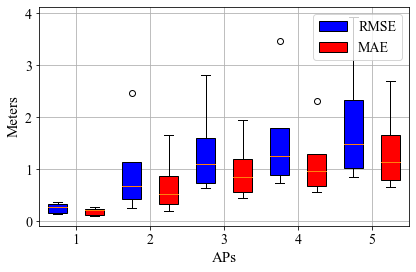

In [24]:
# Datos combinados para el gráfico de bigotes

combined_data = []

for i in range(5):
    combined_data.append(rmse[i,:])
    combined_data.append(mae[i,:])

# combined_data = [rmse[i, :] for i in range(rmse.shape[0])] + [mae[i, :] for i in range(mae.shape[0])]
# Etiquetas para el gráfico de bigotes
labels = ['RMSE', 'MAE']


# Colores para los bigotes
colors = ['blue', 'red']

# Crear el gráfico de bigotes
fig, ax = plt.subplots()
bp = ax.boxplot(combined_data, patch_artist=True)

# Configurar colores y leyendas
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors[i % 2])

# Configurar leyendas
legend_labels = ax.legend(bp['boxes'][:2], labels, loc='upper right')
for label in legend_labels.get_texts():
    label.set_fontsize(14)

if simulation == 'maps':
# Configurar etiquetas de eje x
    xticklabels = ['1', '2', '3', '4', '5']
    ax.set_xlabel('APs', fontsize=15)
    ax.set_ylabel('Meters', fontsize=15)
else:
    xticklabels = ['2', '3', '4', '5']
    ax.set_xlabel('APs', fontsize=15)
    ax.set_ylabel('%', fontsize=15)
ax.set_xticks(np.arange(1, len(xticklabels) + 1) * 2 - 0.5)
ax.set_xticklabels(xticklabels)
# ax.set_title('Gráfico de Bigotes para RMSE y MAE')

# Configurar fuente y tamaño de letra
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# Agregar grilla
ax.grid(True)
plt.tight_layout()
    # Guardar la figura en un archivo PDF
if simulation == 'maps':    
    with PdfPages('G:/Otros ordenadores/False-2-Tesis-Maestria/DataSet5GHz/Users-and-APsOpti-final/Results/RME_metrics_box.pdf') as pdf:
        pdf.savefig(fig, bbox_inches='tight')
else:
    with PdfPages('E:/DataSet5GHz/Models/CME_metrics_box.pdf') as pdf:
        pdf.savefig(fig, bbox_inches='tight')
# Mostrar el gráfico
plt.show()

In [31]:
i = 4

# print((rmse[i,:]))
# print((mae[i,:]))

print(np.mean(rmse[i]))
print(np.std(rmse[i]))
print()
print(np.mean(mae[i]))
print(np.std(mae[i]))

1.9250273
1.1280661

1.3908552
0.7421816


In [23]:
# import matplotlib.pyplot as plt

# # Definir la estructura de la red neuronal
# capas = [784, 256, 128, 10]  # Número de neuronas en cada capa

# # Crear la figura y los ejes
# fig, ax = plt.subplots()

# # Configurar los límites de los ejes
# ax.set_xlim(0, len(capas) - 1)
# ax.set_ylim(0, max(capas))

# # Dibujar los nodos de la red neuronal
# for i, capa in enumerate(capas):
#     for j in range(capa):
#         ax.scatter(i, j, color='b', s=50)

# # Dibujar las conexiones entre los nodos
# for i in range(len(capas) - 1):
#     capa_actual = capas[i]
#     capa_siguiente = capas[i + 1]
#     for j in range(capa_actual):
#         for k in range(capa_siguiente):
#             ax.plot([i, i + 1], [j, k], color='r')

# # Etiquetar los ejes
# ax.set_xticks(range(len(capas)))
# ax.set_xticklabels(['Entrada'] + [f'Capa {i+1}' for i in range(len(capas)-2)] + ['Salida'])
# ax.set_ylabel('Neuronas')

# # Mostrar el gráfico
# plt.show()
